In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data_path = '/Users/xenokian/Desktop/ma_statewide_2020_04_01.csv'

In [3]:
df = pd.read_csv(data_path)

/var/folders/rz/k_h5bs1x2nnd1n_p465cxtmm0000gn/T/ipykernel_8389/606058143.py:1: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [ ]:
#The data set I am investigating contains information on police stops made by Massachusetts State Police (my home state)
#from December 2006 to December 2015. My null hypothesis is that race correlates to whether or not a citation was issued.

In [4]:
df.head(5)

,raw_row_number,date,location,county_name,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,contraband_weapons,contraband_alcohol,contraband_other,frisk_performed,search_conducted,search_basis,reason_for_stop,vehicle_type,vehicle_registration_state,raw_Race
0,1,2007-06-06,MIDDLEBOROUGH,Plymouth County,33.0,white,male,vehicular,False,True,...,NaN,False,NaN,NaN,False,NaN,Speed,Passenger,MA,White
1,2,2007-06-07,SEEKONK,Bristol County,36.0,white,male,vehicular,False,False,...,False,False,False,False,True,other,NaN,Commercial,MA,White
2,3,2007-06-07,MEDFORD,Middlesex County,56.0,white,female,vehicular,False,False,...,NaN,False,NaN,NaN,False,NaN,NaN,Passenger,MA,White
3,4,2007-06-07,MEDFORD,Middlesex County,37.0,white,male,vehicular,False,False,...,NaN,False,NaN,NaN,False,NaN,NaN,Commercial,MA,White
4,5,2007-06-07,EVERETT,Middlesex County,22.0,hispanic,female,vehicular,False,True,...,NaN,False,NaN,NaN,False,NaN,NaN,Commercial,MA,Hispanic


In [5]:
df.shape

(3416238, 24)

In [6]:
df['citation_issued'] = df['citation_issued'].fillna(False).astype(bool)
df['raw_Race'] = df['raw_Race'].fillna('Unknown')

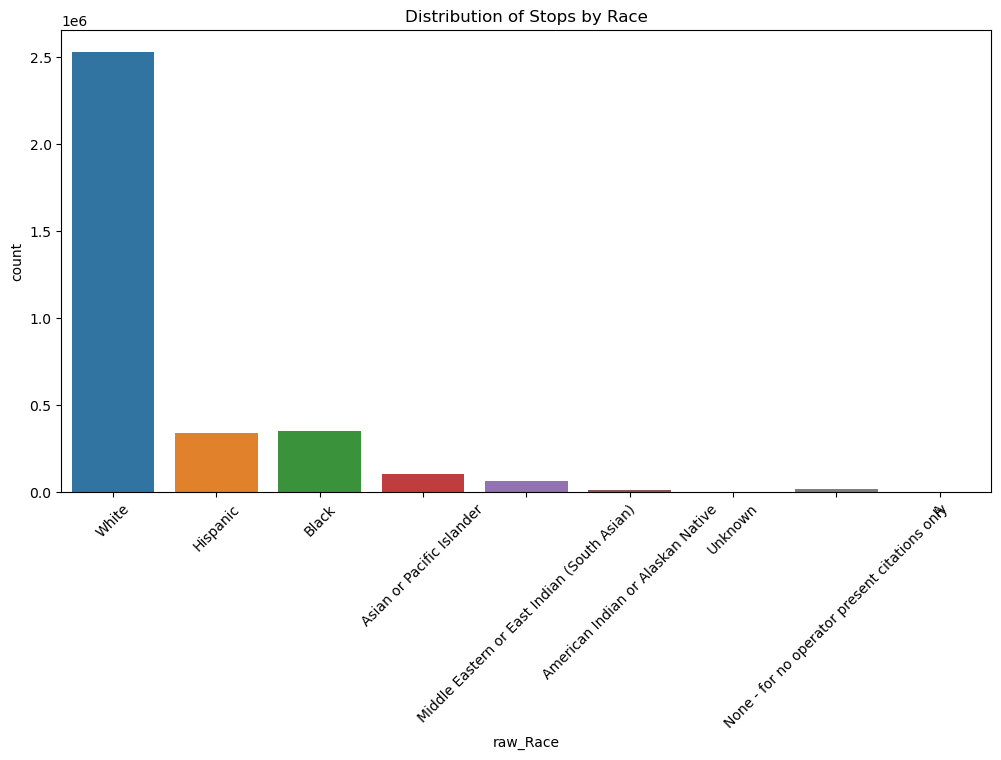

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='raw_Race')
plt.title('Distribution of Stops by Race')
plt.xticks(rotation=45)
plt.show()

In [8]:
#As shown above, there is more white people stopped than the other races. I made this countplot to get a good idea of what race is stopped
# the most before I do any further investigation into my null hypothesis.

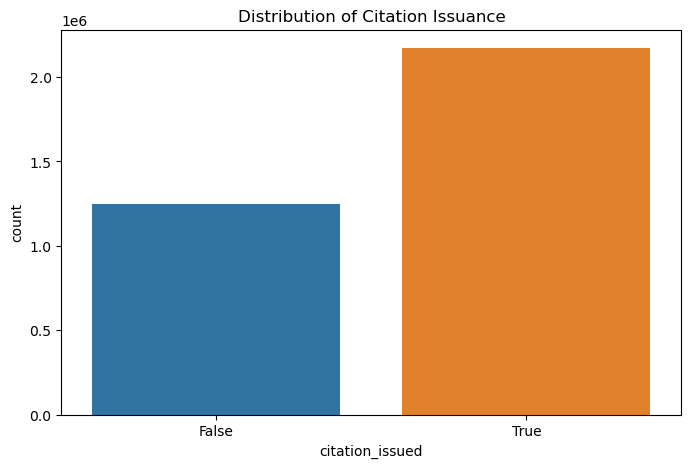

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='citation_issued')
plt.title('Distribution of Citation Issuance')
plt.show()

In [ ]:
#We can also see here that more often than not, a citation is issued, which argues against the null hypothesis.

In [10]:
df['citation_status'] = df['citation_issued'].map({True: 'Issued', False: 'Not Issued'})

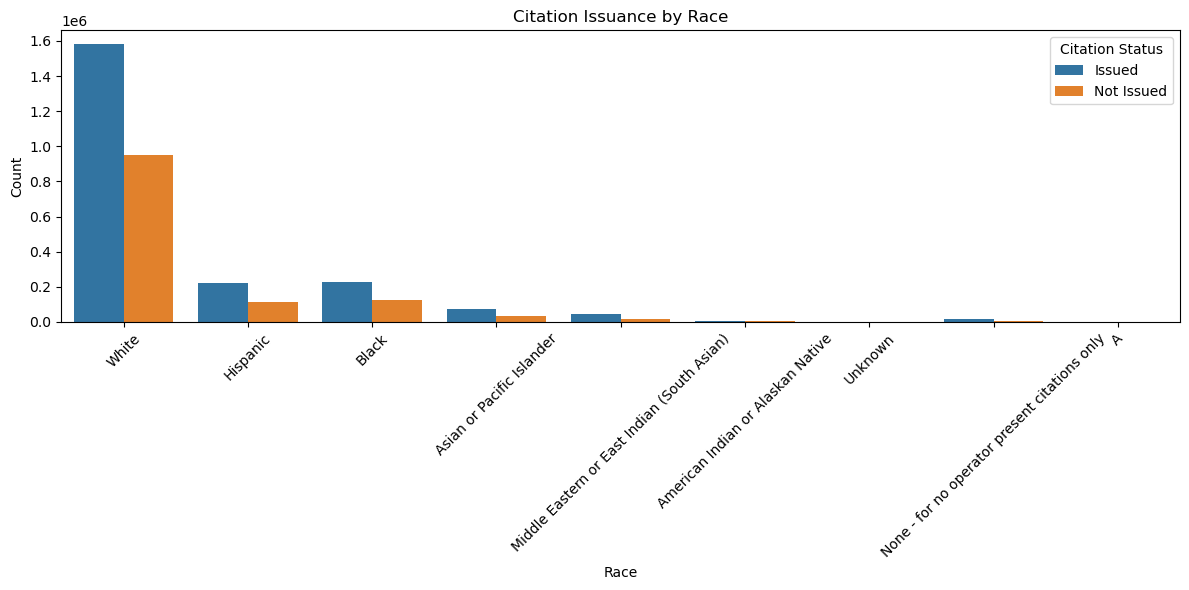

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='raw_Race', hue='citation_status')
plt.title('Citation Issuance by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Citation Status')
plt.tight_layout()
plt.show()

In [ ]:
#The citations issued by race also follows the pattern of citations being issued, as it looks that just less than double 
#the amount of stops for each race recieve a citation.

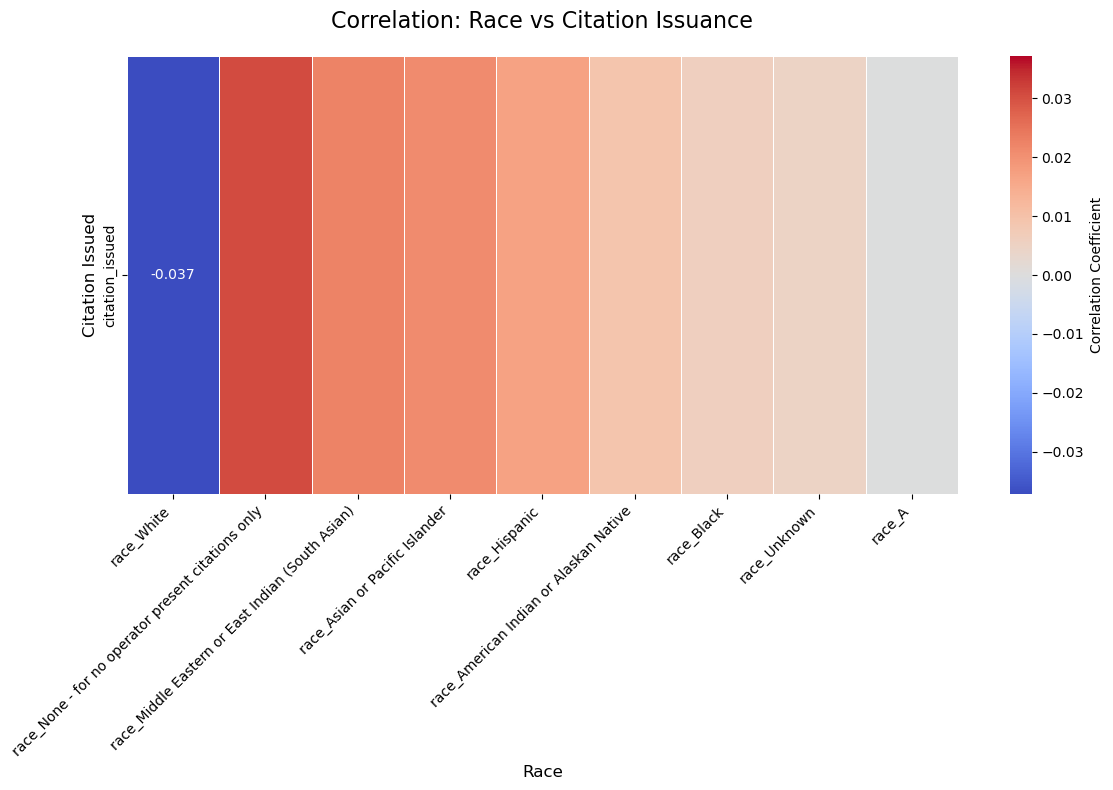

race_White                                           -0.037195
race_None - for no operator present citations only    0.030552
race_Middle Eastern or East Indian (South Asian)      0.022418
race_Asian or Pacific Islander                        0.021168
race_Hispanic                                         0.016926
race_American Indian or Alaskan Native                0.009046
race_Black                                            0.005996
race_Unknown                                          0.004670
race_A                                               -0.000216
Name: citation_issued, dtype: float64


In [12]:
race_dummies = pd.get_dummies(df['raw_Race'], prefix='race')
correlation_data = pd.concat([race_dummies, df['citation_issued']], axis=1)

correlation_matrix = correlation_data.corr()

correlation_with_citation = correlation_matrix['citation_issued'].drop('citation_issued')

correlation_with_citation = correlation_with_citation.reindex(correlation_with_citation.abs().sort_values(ascending=False).index)

plt.figure(figsize=(12, 8))

max_corr = max(abs(correlation_with_citation.max()), abs(correlation_with_citation.min()))

vmin, vmax = -max_corr, max_corr

sns.heatmap(correlation_with_citation.to_frame().T, 
            annot=True, 
            cmap='coolwarm', 
            vmin=vmin,
            vmax=vmax,
            center=0,
            fmt='.3f',
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation: Race vs Citation Issuance', fontsize=16, pad=20)
plt.ylabel('Citation Issued', fontsize=12)
plt.xlabel('Race', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(correlation_with_citation)

In [13]:
def calculate_correlation(race):
    race_data = (df['raw_Race'] == race).astype(int)
    correlation, p_value = stats.pearsonr(race_data, df['citation_issued'].astype(int))
    return correlation, p_value

correlations = {}
for race in df['raw_Race'].unique():
    correlations[race] = calculate_correlation(race)

print("Pearson Correlation Coefficients and p-values:")
for race, (correlation, p_value) in correlations.items():
    print(f"{race}: Correlation = {correlation:.4f}, p-value = {p_value:.4f}")

Pearson Correlation Coefficients and p-values:
White: Correlation = -0.0372, p-value = 0.0000
Hispanic: Correlation = 0.0169, p-value = 0.0000
Black: Correlation = 0.0060, p-value = 0.0000
Asian or Pacific Islander: Correlation = 0.0212, p-value = 0.0000
Middle Eastern or East Indian (South Asian): Correlation = 0.0224, p-value = 0.0000
American Indian or Alaskan Native: Correlation = 0.0090, p-value = 0.0000
Unknown: Correlation = 0.0047, p-value = 0.0000
None - for no operator present citations only: Correlation = 0.0306, p-value = 0.0000
A: Correlation = -0.0002, p-value = 0.6903


In [14]:
#As shown, there is little to no correlation between race and citations issued in this data set, as all the correlation coefficients are 
#close to 0, and the p-value is 0. This disproves my null hypothesis of race being correlated to whether a not a citation is issued in a 
#traffic stop in Massachusetts.